## Mineração de *dados*

*Luiz Fernando Puttow Southier*<br>
*UTFPR-PB*

## Agrupamento


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


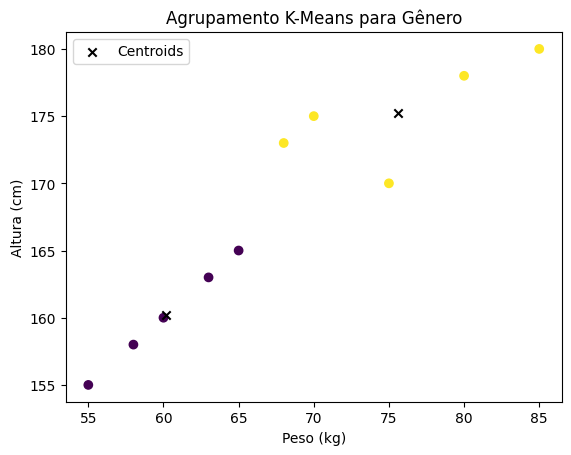

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Dados de exemplo (Peso, Altura, Gênero)
homens = np.array([(70, 175), (85, 180), (75, 170), (80, 178), (68, 173)])
mulheres = np.array([(60, 160), (55, 155), (65, 165), (58, 158), (63, 163)])

X = np.vstack((homens, mulheres))

# Criando o modelo de agrupamento K-Means com 2 clusters
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)
labels = kmeans.labels_

# Plotando os pontos de dados coloridos pelos clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

# Plotando os centróides dos clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black', label='Centroids')

plt.xlabel('Peso (kg)')
plt.ylabel('Altura (cm)')
plt.title('Agrupamento K-Means para Gênero')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


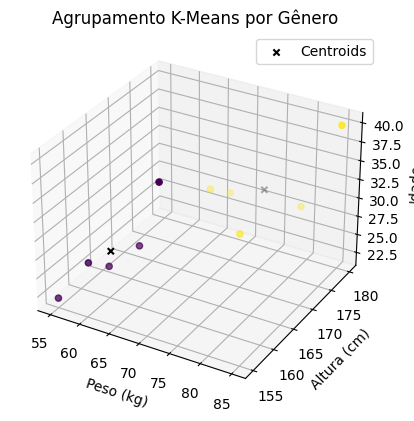

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Dados de exemplo (Peso, Altura, Idade, Gênero)
dados = np.array([
    [70, 175, 30, 'Homem'],
    [60, 160, 25, 'Mulher'],
    [85, 180, 40, 'Homem'],
    [55, 155, 22, 'Mulher'],
    [75, 170, 28, 'Homem'],
    [65, 165, 35, 'Mulher'],
    [80, 178, 29, 'Homem'],
    [58, 158, 26, 'Mulher'],
    [68, 173, 31, 'Homem'],
    [63, 163, 27, 'Mulher']
])

# Dividindo os dados em atributos (Peso, Altura, Idade)
X = dados[:, :3].astype(float)

# Criando o modelo de agrupamento K-Means com 2 clusters
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)
labels = kmeans.labels_

# Plotando os pontos de dados coloridos pelos clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')

# Plotando os centróides dos clusters
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', color='black', label='Centroids')

ax.set_xlabel('Peso (kg)')
ax.set_ylabel('Altura (cm)')
ax.set_zlabel('Idade')
ax.set_title('Agrupamento K-Means por Gênero')
ax.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


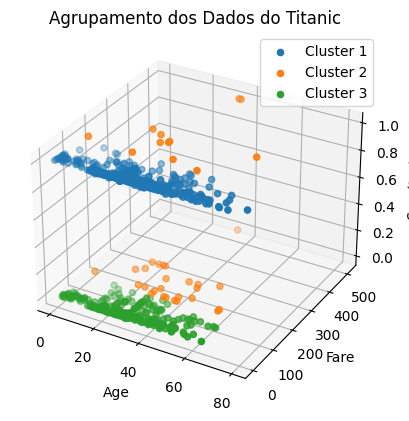

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Carregar os dados do Titanic usando o Seaborn
titanic_data = sns.load_dataset('titanic')

# Preencher valores ausentes na coluna 'age' com a média das idades
titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)

# Converter a coluna 'sex' para variáveis dummy binárias
titanic_data = pd.get_dummies(titanic_data, columns=['sex'], drop_first=True)

# Selecionar as características relevantes para o agrupamento
selected_features = ['age', 'fare', 'sex_male']
X = titanic_data[selected_features]

# Padronizar os dados para ter média zero e variância unitária
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Criar o modelo de agrupamento K-Means
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

# Adicionar as etiquetas de cluster aos dados originais
titanic_data['Cluster'] = kmeans.labels_

# Plotar os agrupamentos no espaço 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster in range(num_clusters):
    cluster_data = titanic_data[titanic_data['Cluster'] == cluster]
    ax.scatter(cluster_data['age'], cluster_data['fare'], cluster_data['sex_male'], label=f'Cluster {cluster + 1}')

ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Sex (Male)')
ax.set_title('Agrupamento dos Dados do Titanic')
ax.legend()
plt.show()
